In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Step 2: Load dataset
df = pd.read_csv("loan_default_risk_dataset.csv")  # CSV should be avialable in the same working directory
df.head()

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
0,60.0,2996.52,2378.49,0
1,66.4,4137.23,1538.92,1
2,58.5,19865.75,2434.80,1
3,49.8,16855.70,2677.82,1
4,67.3,7902.37,2206.72,0


In [9]:
# Step 3: Explore the dataset
print("Dataset Info:\n")
print(df.info())

print("\n Missing values:\n")
print(df.isnull().sum())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Retirement_Age     300 non-null    float64
 1   Debt_Amount        299 non-null    float64
 2   Monthly_Savings    298 non-null    float64
 3   Loan_Default_Risk  300 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.5 KB
None

 Missing values:

Retirement_Age       0
Debt_Amount          1
Monthly_Savings      2
Loan_Default_Risk    0
dtype: int64


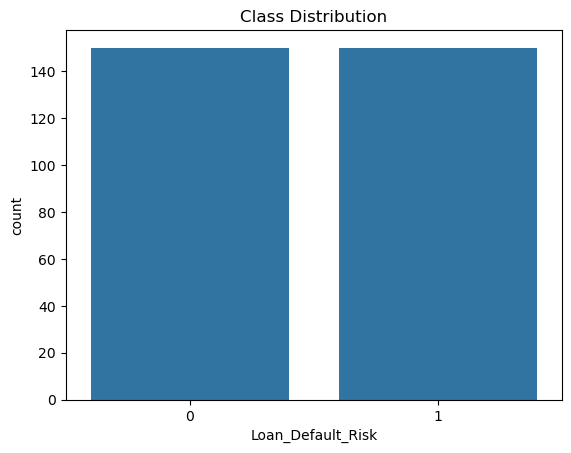

In [11]:
# Visualize class distribution
sns.countplot(x='Loan_Default_Risk', data=df)
plt.title("Class Distribution")
plt.show()


In [15]:
# Step 4: Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1]) # Impute all cols except the target col 'Loan_Default_Risk'

print("Missing values after imputation:\n")
print(df.isnull().sum())

Missing values after imputation:

Retirement_Age       0
Debt_Amount          0
Monthly_Savings      0
Loan_Default_Risk    0
dtype: int64


In [17]:
# Step 5: Define features and target
X = df.drop("Loan_Default_Risk", axis=1)
y = df["Loan_Default_Risk"]

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 240
Testing samples: 60


In [19]:
# Step 7: Train the logistic regression model with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [21]:
# Step 8: Evaluate the model
y_pred = model.predict(X_test)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [23]:
# Insights:
"""Excellent performance on both classes.
 	Only 1 misclassification: one actual defaulter was predicted as non-defaulter.
 	Balanced accuracy and F1-score show the model is reliable for both outcomes.
 	class_weight='balanced' helped overcome any imbalance issues in the small dataset."""

"Excellent performance on both classes.\n \tOnly 1 misclassification: one actual defaulter was predicted as non-defaulter.\n \tBalanced accuracy and F1-score show the model is reliable for both outcomes.\n \tclass_weight='balanced' helped overcome any imbalance issues in the small dataset."

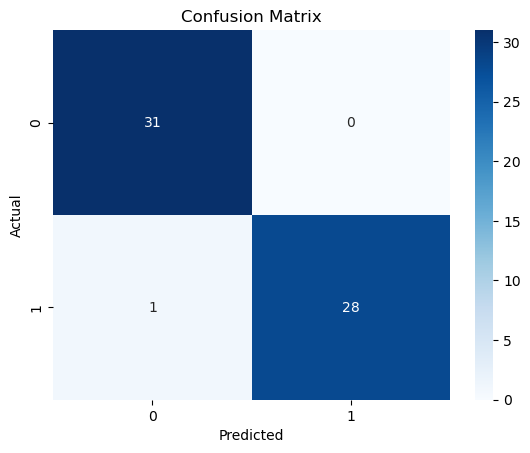

In [25]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
# 31 - True Positives
# 28 - True Negatives